# IMDB 영화 리뷰 데이터

 Kaggle 영화리뷰 데이터 LSTM 분석

In [23]:
# 모듈 불러 오기
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, Dropout, Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [24]:
# 경로 설정
root_path = "/content/drive/My Drive/멀티캠퍼스/[혁신성장] 인공지능 자연어처리 기반/[강의]/조성현 강사님"
data_path = f"{root_path}/dataset"
data_input_path = f"{data_path}/4-1.train_input.npy"
data_label_path = f"{data_path}/4-1.train_label.npy"

데이터 형태 확인

```
# data_input

array([[  404,    70,   419, ...,    25,    16,   640],
       [  232,   203,  3048, ...,     0,     0,     0],
       [    2,   382,  2818, ...,  1109,    49,    30],
       ...,
       [  117,  3104,    14, ...,     0,     0,     0],
       [  639,   516, 16593, ...,     0,     0,     0],
       [  109,     1,   350, ...,     0,     0,     0]], dtype=int32)

```

In [25]:
# 데이터 로드
data_input = np.load(open(data_input_path, 'rb'))
data_label = np.load(open(data_label_path, 'rb'))

In [26]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data_input, data_label, 
                                                    test_size=0.1, 
                                                    random_state=42) 

In [27]:
# LSTM 모델 파라미터 설정
VOCAB_SIZE = data_input.max() + 1 # 패딩용 단어
EMBEDDING_DIM = int(input('임베딩 벡터 차원 설정: '))
n_hidden = int(input('LSTM 출력 노드 수 설정: '))
FEATURE_DIM = int(input('은닉층 노드 수 설정: '))

임베딩 벡터 차원 설정: 64
LSTM 출력 노드 수 설정: 128
은닉층 노드 수 설정: 256


In [28]:
# LSTM 네트워크 설정
X_input = Input(batch_shape=(None, data_input.shape[1]))
X_embed = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM)(X_input)
X_embed = Dropout(0.2)(X_embed)
X_lstm = LSTM(n_hidden)(X_embed)
X_dense = Dense(FEATURE_DIM, activation='relu', kernel_regularizer=l2(0.01))(X_lstm)
y_output = Dense(1, activation='sigmoid')(X_dense)

In [29]:
# 모델 설정
model = Model(X_input, y_output)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005))
print("========= 모델 전체 구조 확인 =========")
print(model.summary())

========= 모델 전체 구조 확인 =========
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 174)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 174, 64)           4740224   
_________________________________________________________________
dropout_1 (Dropout)          (None, 174, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 4,872,321
Trainable params: 4,872,321
Non-trainable params: 0
____________

In [30]:
# 모델 학습
y_train = y_train.reshape(-1, 1) # 2차원 array로 변경
y_test = y_test.reshape(-1, 1)

EPOCHS = int(input('학습 에폭 수 설정: '))
BATCH = int(input('배치 사이즈 설정: '))

es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
hist = model.fit(X_train, y_train,
                 validation_data = (X_test, y_test),
                 batch_size=BATCH,
                 epochs=EPOCHS,
                 callbacks=[es])

학습 에폭 수 설정: 1000
배치 사이즈 설정: 500
Epoch 1/1000
45/45 [==============================] - 84s 2s/step - loss: 2.0040 - val_loss: 1.6536
Epoch 2/1000
45/45 [==============================] - 81s 2s/step - loss: 1.3900 - val_loss: 1.2030
Epoch 3/1000
45/45 [==============================] - 85s 2s/step - loss: 1.0682 - val_loss: 0.9670
Epoch 4/1000
45/45 [==============================] - 79s 2s/step - loss: 0.8708 - val_loss: 0.8141
Epoch 5/1000
45/45 [==============================] - 82s 2s/step - loss: 0.7547 - val_loss: 0.7207
Epoch 6/1000
45/45 [==============================] - 82s 2s/step - loss: 0.6783 - val_loss: 0.6804
Epoch 7/1000
45/45 [==============================] - 81s 2s/step - loss: 0.6500 - val_loss: 0.6605
Epoch 8/1000
45/45 [==============================] - 82s 2s/step - loss: 0.6342 - val_loss: 0.6469
Epoch 9/1000
45/45 [==============================] - 76s 2s/step - loss: 0.6244 - val_loss: 0.6434
Epoch 10/1000
45/45 [==============================] - 81s 2s/step -

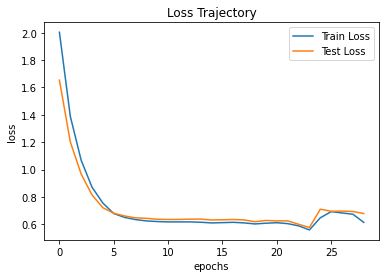

In [31]:
# loss 시각화
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Trajectory')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [32]:
# 결과 확인
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0) # binary 라벨
accuracy = (y_pred == y_test).mean()
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.6132
